**Machine Learning Project**
*USA HOUSE PRICE PREDICTION*

Importing the Dependencies

In [125]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

**import plotly.express as px**
* This imports Plotly Express, a high-level interface for creating quick and easy visualizations. Plotly Express is part of the Plotly library and helps in generating various types of plots like line charts, bar charts, scatter plots, etc., with minimal code.

**import plotly.graph_objs as go**
* This imports Plotly Graph Objects, which provide more control over the customization of visualizations compared to Plotly Express.

**from sklearn.preprocessing import LabelEncoder**
* This imports the LabelEncoder class from sklearn.preprocessing. LabelEncoder is used to encode categorical string labels as integers. For example, it will convert labels like ['red', 'blue', 'green'] into [0, 1, 2].

**from sklearn.ensemble import RandomForestRegressor**
*  This imports the RandomForestRegressor from sklearn.ensemble. Random Forest is an ensemble learning method that constructs multiple decision trees and combines their results to make more accurate predictions. It is commonly used for regression tasks to predict continuous values.

**from sklearn.model_selection import train_test_split**
* This imports the train_test_split function from sklearn.model_selection. This function is used to split the dataset into training and testing subsets. The training set is used to train the model, and the test set is used to evaluate the model’s performance.

**from sklearn.metrics import r2_score**
* This imports the r2_score function from sklearn.metrics. The R² score is a statistical measure that represents the proportion of variance in the dependent variable that is predictable from the independent variables. In simple terms, it tells how well the regression model fits the data (closer to 1 is better).

**from sklearn.metrics import mean_squared_error**

* This imports the mean_squared_error (MSE) function from sklearn.metrics. MSE is a metric used to evaluate the performance of a regression model. It calculates the average squared difference between actual and predicted values (lower is better)

**from sklearn.metrics import mean_absolute_error**

* This imports the mean_absolute_error (MAE) function from sklearn.metrics. MAE is another evaluation metric for regression models. It calculates the average absolute difference between actual and predicted values, which provides a sense of the average magnitude of errors (lower is better).


Reading Data

In [126]:
df = pd.read_csv('/content/USA Housing Dataset.csv')

In [127]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
5,2014-05-10 00:00:00,320000.0,3.0,2.50,2130,6969,2.0,0,0,3,2130,0,2003,0,Cedar to Green River Trail,Maple Valley,WA 98038,USA
6,2014-05-10 00:00:00,875000.0,4.0,2.00,2520,6000,1.0,0,0,3,1400,1120,1921,2007,6521 Fremont Ave N,Seattle,WA 98103,USA
7,2014-05-10 00:00:00,265000.0,4.0,1.00,1940,9533,1.0,0,0,3,1080,860,1962,2003,9908 S 210th Pl,Kent,WA 98031,USA
8,2014-05-10 00:00:00,394950.0,3.0,2.50,1350,1250,3.0,0,0,3,1270,80,2006,0,5940 California Ave SW,Seattle,WA 98136,USA
9,2014-05-11 00:00:00,842500.0,4.0,2.50,2160,5298,2.5,0,0,4,2160,0,1902,0,906 17th Ave,Seattle,WA 98122,USA


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

EDA(Exploratory Data Analysis)

In [129]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


In [130]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [131]:
print(df['city'].unique)

<bound method Series.unique of 0         Seattle
1       Carnation
2        Issaquah
3         Seattle
4         Seattle
          ...    
4135      Seattle
4136     Bellevue
4137       Renton
4138      Seattle
4139    Covington
Name: city, Length: 4140, dtype: object>


In [132]:
df.shape

(4140, 18)

In [133]:
#Data Cleaning Or Missing Value Handeling
df.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [134]:
#Dropping unused data
df = df.drop(['date','country','statezip'], axis=1)
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city
0,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle
1,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation
2,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah
3,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle
4,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle
5,320000.0,3.0,2.50,2130,6969,2.0,0,0,3,2130,0,2003,0,Cedar to Green River Trail,Maple Valley
6,875000.0,4.0,2.00,2520,6000,1.0,0,0,3,1400,1120,1921,2007,6521 Fremont Ave N,Seattle
7,265000.0,4.0,1.00,1940,9533,1.0,0,0,3,1080,860,1962,2003,9908 S 210th Pl,Kent
8,394950.0,3.0,2.50,1350,1250,3.0,0,0,3,1270,80,2006,0,5940 California Ave SW,Seattle
9,842500.0,4.0,2.50,2160,5298,2.5,0,0,4,2160,0,1902,0,906 17th Ave,Seattle


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

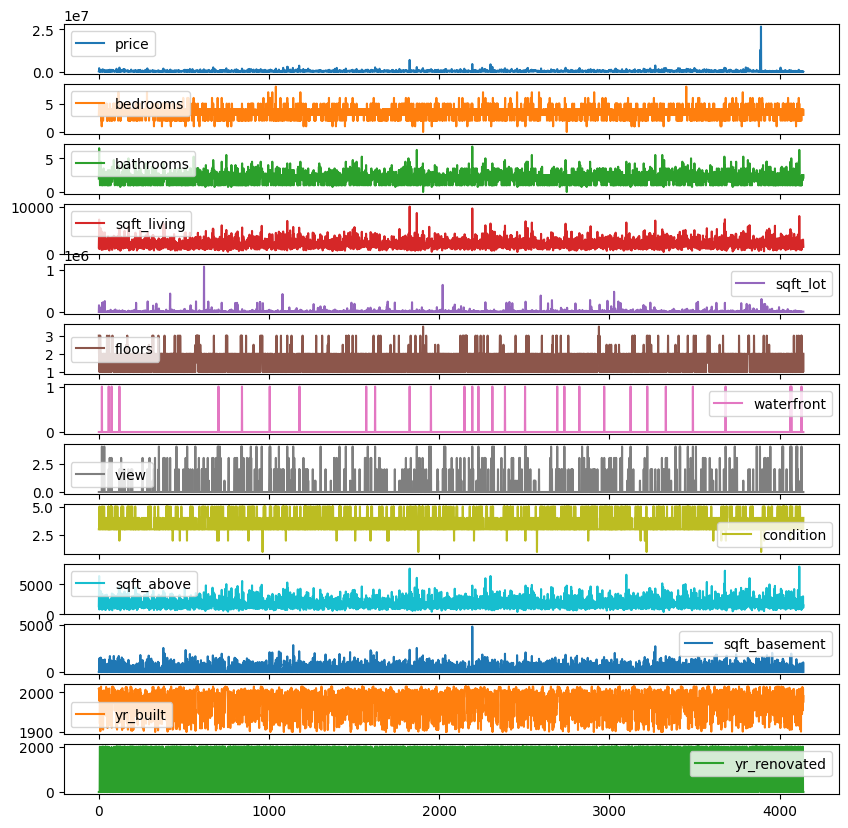

In [135]:
df.plot(subplots = True, figsize = (10,10))

In [136]:
gp = df.groupby(['bedrooms' , 'bathrooms']).aggregate({'price':'sum'})
gp.head(10).T

bedrooms         0.0        1.0                                           \
bathrooms       0.00       0.75       1.00      1.25      1.50      1.75   
price      2390648.0  2172550.0  5617850.0  516500.0  930000.0  355000.0   

bedrooms                             2.0                
bathrooms      2.00      2.25       0.75          1.00  
price      115000.0  458000.0  2532201.0  9.428248e+07

In [137]:
fig = px.histogram(df, x='price', nbins=100)
fig.show()

Label Encoding

In [138]:
le = LabelEncoder()

for col in df.columns:  # Loop through each column in the dataframe
    if df[col].dtype == 'object':  # Check if the column's data type is 'object' (i.e., strings)
        df[col] = le.fit_transform(df[col])  # Apply LabelEncoder to convert strings into numerical labels


In [139]:
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city
0,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,3962,34
1,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,2491,7
2,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,3511,15
3,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,3762,34
4,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,177,34
5,320000.0,3.0,2.50,2130,6969,2.0,0,0,3,2130,0,2003,0,4066,20
6,875000.0,4.0,2.00,2520,6000,1.0,0,0,3,1400,1120,1921,2007,3415,34
7,265000.0,4.0,1.00,1940,9533,1.0,0,0,3,1080,860,1962,2003,4057,17
8,394950.0,3.0,2.50,1350,1250,3.0,0,0,3,1270,80,2006,0,3295,34
9,842500.0,4.0,2.50,2160,5298,2.5,0,0,4,2160,0,1902,0,3919,34


In [140]:
df.dtypes

,0
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64
sqft_above,int64


**Modeling**

In [141]:
X = df.drop('price', axis = 1)
Y = df['price']

In [142]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y , test_size = 0.2 , random_state = 42)

**Model Training**

In [143]:
model  = RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

In [144]:
y_pred = model.predict(X_test)

In [145]:
trace_actual = go.Scatter(
    x = list(range(len(Y_test))),
    y = Y_test,
    mode = 'markers',
    name = 'Actual'
)

* go.Scatter
This is a function from Plotly's graph_objects module (commonly imported as go) used to create a scatter plot. It plots individual points based on x and y values.

* The x axis values are created as a sequence of numbers from 0 to len(Y_test) - 1. This creates an index for each point in Y_test. For example, if Y_test has 100 values, x will range from 0 to 99.
* len(Y_test) gets the total number of elements in Y_test, and range(len(Y_test)) creates a range of numbers from 0 up to len(Y_test) - 1.
* The list() function converts this range into a list so that it can be used as x values in the scatter plot.

In [146]:
trace_pred = go.Scatter(
    x = list(range(len(y_pred))),
    y = y_pred,
    mode = 'lines',
    name = 'Predicted'
)

In [147]:
# Layout Settings
layout = go.Layout(
    title = 'Actual vs Predicted',
    xaxis = dict(title = 'Index'),
    yaxis = dict(title = 'Price')
)

In [148]:
# Combine traces and layout into figure

fig = go.Figure(data=[trace_actual, trace_pred], layout=layout)
fig.show()

R2 Square

In [149]:
r2 = r2_score(Y_test, y_pred)
print('R-squared score:', r2)

R-squared score: -0.6298417352690384


Mean Square Error

In [151]:
mse = mean_squared_error(Y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 170865183689.72556
Root Mean Squared Error: 413358.4203687226
